In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Membaca file data
file_path = 'produksiPadi.xlsx'  # Ganti dengan lokasi file Anda
data = pd.read_excel(file_path)

# Menambahkan kolom lagging
data['Produksi_Padi_Lag'] = data['Produksi Padi(Ton)'].shift(1)

# Menghapus baris dengan nilai NaN
data = data.dropna().reset_index(drop=True)

# Memisahkan fitur (X) dan target (y)
X = data[['Produksi_Padi_Lag']]
y = data['Produksi Padi(Ton)']

# Membagi data menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan koefisien dan intercept
print("Koefisien:", model.coef_[0])
print("Intercept:", model.intercept_)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Koefisien: 0.9740641492080732
Intercept: 1998924.0456791073
Mean Squared Error (MSE): 36788069362837.18
Root Mean Squared Error (RMSE): 6065316.921879448
Mean Absolute Percentage Error (MAPE): 0.05555596706797071


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tahun               53 non-null     int64  
 1   Produksi Padi(Ton)  53 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 980.0 bytes
None

Beberapa Baris Dataset:
   Tahun  Produksi Padi(Ton)
0   1970          18693649.0
1   1971          20483687.0
2   1972          19393933.0
3   1973          21490578.0
4   1974          22476073.0

Dataset Setelah Penambahan Kolom Lagging:
   Tahun  Produksi Padi(Ton)  Produksi_Padi_Lag
0   1971          20483687.0         18693649.0
1   1972          19393933.0         20483687.0
2   1973          21490578.0         19393933.0
3   1974          22476073.0         21490578.0
4   1975          22339455.0         22476073.0

Ukuran Dataset:
Data Latih: (36, 1) Data Uji: (16, 1)

Hasil Pelatihan Model:
Koefisien: 0.9

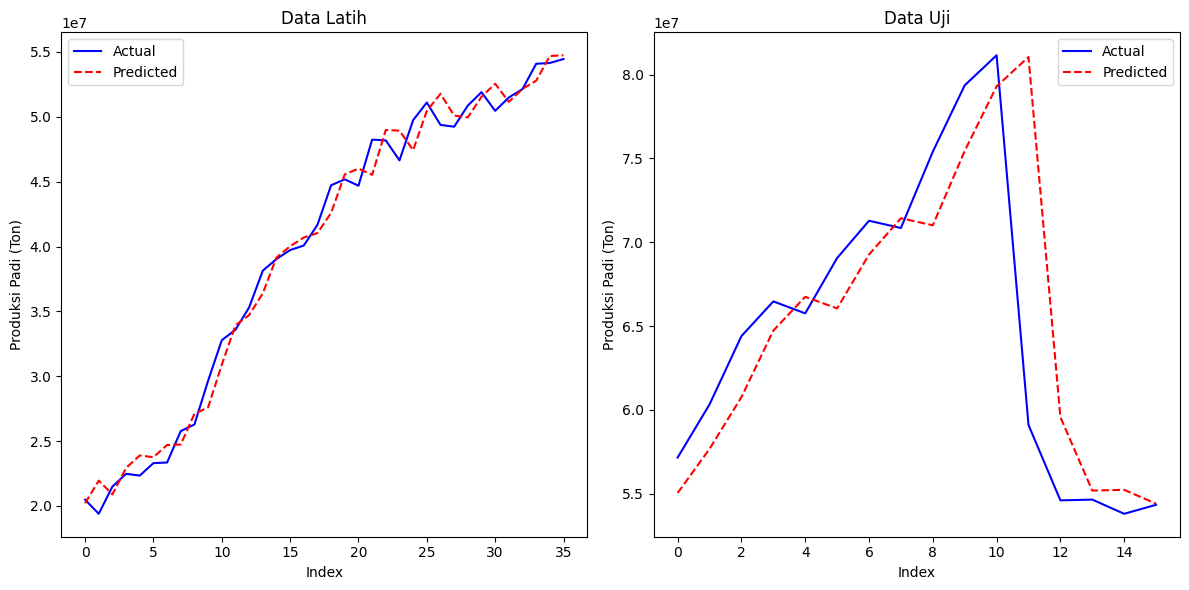

In [12]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Membaca file data
file_path = 'produksiPadi.xlsx'  # Ganti dengan nama file Anda
data = pd.read_excel(file_path)

# Menampilkan informasi awal tentang dataset
print("Informasi Dataset:")
print(data.info())
print("\nBeberapa Baris Dataset:")
print(data.head())

# Menambahkan kolom lagging
data['Produksi_Padi_Lag'] = data['Produksi Padi(Ton)'].shift(1)

# Menghapus baris dengan nilai NaN
data = data.dropna().reset_index(drop=True)

# Menampilkan data setelah lagging
print("\nDataset Setelah Penambahan Kolom Lagging:")
print(data.head())

# Memisahkan fitur (X) dan target (y)
X = data[['Produksi_Padi_Lag']]
y = data['Produksi Padi(Ton)']

# Membagi data menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Menampilkan ukuran dataset
print("\nUkuran Dataset:")
print("Data Latih:", X_train.shape, "Data Uji:", X_test.shape)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan koefisien dan intercept
print("\nHasil Pelatihan Model:")
print("Koefisien:", model.coef_[0])
print("Intercept:", model.intercept_)

# Membuat prediksi pada data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print("\nEvaluasi Model:")
print("Data Latih:")
print(f"  MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.2%}")
print("Data Uji:")
print(f"  MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.2%}")

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))

# Plot data latih
plt.subplot(1, 2, 1)
plt.plot(y_train.values, label="Actual", color="blue")
plt.plot(y_train_pred, label="Predicted", color="red", linestyle="--")
plt.title("Data Latih")
plt.xlabel("Index")
plt.ylabel("Produksi Padi (Ton)")
plt.legend()

# Plot data uji
plt.subplot(1, 2, 2)
plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(y_test_pred, label="Predicted", color="red", linestyle="--")
plt.title("Data Uji")
plt.xlabel("Index")
plt.ylabel("Produksi Padi (Ton)")
plt.legend()

plt.tight_layout()
plt.show()


Model Linear Regression:
Koefisien: 0.9740641492080732
Intercept: 1998924.0456791073

Validasi Silang (5-Fold):
RMSE per Fold: [2534850.20703082 1299292.33329612 1493883.91031377 2860611.02311431
 7781861.37477491]
RMSE Rata-rata: 3194099.769705984

Evaluasi Model:
Data Latih: MSE = 1805626293099.2412 , RMSE = 1343735.9461959933 , MAPE = 0.03048716181215214
Data Uji: MSE = 36788069362837.18 , RMSE = 6065316.921879448 , MAPE = 0.05555596706797071


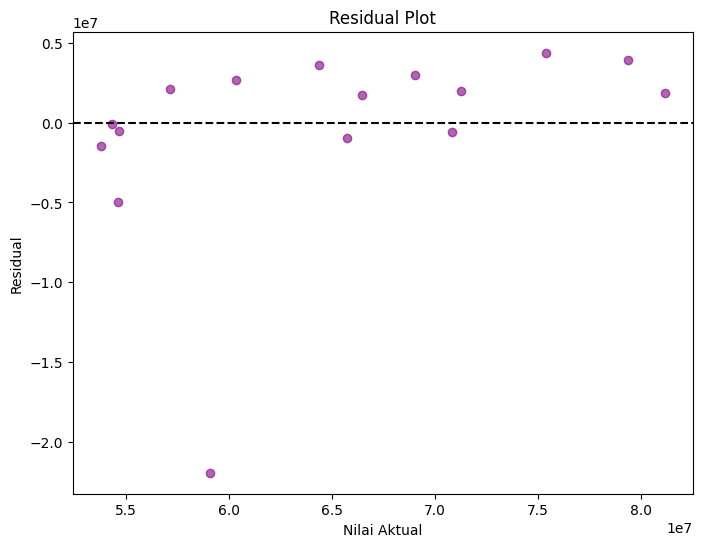


Model telah disimpan sebagai 'model_produksi_padi.pkl'.

Prediksi Produksi Padi Tahun Depan: 54928021.580236785


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import joblib  # Untuk menyimpan model

# Membaca file data
file_path = 'produksiPadi.xlsx'  # Ganti dengan nama file Anda
data = pd.read_excel(file_path)

# Menambahkan kolom lagging
data['Produksi_Padi_Lag'] = data['Produksi Padi(Ton)'].shift(1)
data = data.dropna().reset_index(drop=True)

# Memisahkan fitur (X) dan target (y)
X = data[['Produksi_Padi_Lag']]
y = data['Produksi Padi(Ton)']

# Membagi data menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Menampilkan koefisien dan intercept
print("\nModel Linear Regression:")
print("Koefisien:", model.coef_[0])
print("Intercept:", model.intercept_)

# Evaluasi menggunakan validasi silang
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print("\nValidasi Silang (5-Fold):")
print("RMSE per Fold:", cv_rmse)
print("RMSE Rata-rata:", cv_rmse.mean())

# Membuat prediksi
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrik evaluasi
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print("\nEvaluasi Model:")
print("Data Latih: MSE =", mse_train, ", RMSE =", rmse_train, ", MAPE =", mape_train)
print("Data Uji: MSE =", mse_test, ", RMSE =", rmse_test, ", MAPE =", mape_test)

# Analisis residual
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Nilai Aktual")
plt.ylabel("Residual")
plt.show()

# Simpan model
joblib.dump(model, 'model_produksi_padi.pkl')
print("\nModel telah disimpan sebagai 'model_produksi_padi.pkl'.")

# Prediksi untuk masa depan (contoh: tahun berikutnya)
last_production = data['Produksi Padi(Ton)'].iloc[-1]
future_prediction = model.predict([[last_production]])
print("\nPrediksi Produksi Padi Tahun Depan:", future_prediction[0])


In [14]:
# Ambil produksi padi terakhir sebagai input prediksi (misalnya tahun 2022)
last_production = data['Produksi Padi(Ton)'].iloc[-1]

# Prediksi untuk tahun 2023
prediction_2023 = model.predict([[last_production]])
print("Prediksi Produksi Padi Tahun 2023:", prediction_2023[0])

# Prediksi untuk tahun 2024 (menggunakan prediksi 2023 sebagai input)
prediction_2024 = model.predict([[prediction_2023[0]]])
print("Prediksi Produksi Padi Tahun 2024:", prediction_2024[0])

Prediksi Produksi Padi Tahun 2023: 54928021.580236785
Prediksi Produksi Padi Tahun 2024: 55502340.65391514


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
